# The necessary python libraries are imported here
- numpy is used to perform basic operations.
- pyplot from matplotlib is used to visualize the results.
- pandas is used to read the dataset
- tensorflow is a deeplearning framework
- keras is a deep learning framework

In [ ]:
# tensorflow is developed by google
# tensorflow language is always based on tensors
# list ===== array ===== tensors(vector representation)
# writing only tensorflow is little tricky
# so we use keras as backend of tensorflow

In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 103.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.7 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
print(tf.__version__)

2.19.0


In [ ]:
# Here we are loading the fashion_mnist dataset from the keras

In [ ]:
dir(keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'california_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [ ]:
mnist=keras.datasets.fashion_mnist
# The dataset is download in TFModuleWrapper

In [ ]:
mnist

<module 'keras.api.datasets.fashion_mnist' from '/usr/local/lib/python3.11/dist-packages/keras/api/datasets/fashion_mnist/__init__.py'>

In [ ]:
type(mnist)

module

- No we lod the data into real variables using load_dataset()
- it return 2 tuples. The first tuple has the training data and second has the test data

In [ ]:
(X_train, y_train),(X_test, y_test)=mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


- The data consist of images which means it has pixel values

- By using shape we can see that it has 60,000 images for training and each image has size of 28x28 in x_train and image in y_train

In [ ]:
X_train.shape , y_train.shape
# 60k images in train and 10k in test
# each image shape is 28x28=784 pixel values

((60000, 28, 28), (60000,))

In [ ]:
X_train[0].shape


(28, 28)

In [ ]:
len(X_train[0])
# 28 lists are there
# in each list 28 values are there

28

In [ ]:
X_train[0].shape # First image
X_train[1] # second image

# In image we have 784 pixels are there
# 28*28
# RGB picture : color picture
# Gray : not a color picture

# RGB values ranges between 0 t0 255
# Rainbow: 7
# 2^7=256
# 0= black
# 255= white
# Rainbow


# Digital Image processing    OpenCV

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 222, 209, 203, 215, 200,   0,  70,  98,
          0, 103,  59,  68,  71,  49,   0, 219, 206, 214, 210, 250,  38,
          0,   0],
       [  0,   0,   0,   0, 247, 218, 212, 210, 215, 214,   0, 254, 243,
        139, 255, 174, 251, 255, 205,   0, 215, 217, 214, 208, 220,  95,
          0,   0],
       [  0,   0,   0,  45, 226, 214, 214, 215, 224, 205,   0,  42,  35,
         60,  16,  17,  12,  13,  70,   0, 189, 216, 212, 206, 212, 156,
          0,   0],
       [  0,   0,   0, 164, 235, 214, 211, 220, 216, 201,  52,  71,  89,
         94,  83,  78,  70,  76,  92,  87, 206, 207, 222, 213, 219, 208,
          0,   0],
       [  0,   0,   0, 106, 187, 223, 237, 248, 211, 198, 252, 250, 248,
        245, 248, 252, 253, 250, 252, 239, 201, 212, 225, 215, 193, 113,
          0,   0],
       [  0,   0,   0,   0,   0,  17,  54, 159, 222, 193, 208, 192, 197,
        200, 200, 200, 200, 201, 203, 195, 210, 165,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  47, 225, 192, 214, 203, 206,
        204, 204, 205, 206, 204, 212, 197, 218, 107,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   6,   0,  46, 212, 195, 212, 202, 206,
        205, 204, 205, 206, 204, 212, 200, 218,  91,   0,   3,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  11, 197, 199, 205, 202, 205,
        206, 204, 205, 207, 204, 205, 205, 218,  77,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   2, 191, 198, 201, 205, 206,
        205, 205, 206, 209, 206, 199, 209, 219,  74,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 188, 197, 200, 207, 207,
        204, 207, 207, 210, 208, 198, 207, 221,  72,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 215, 198, 203, 206, 208,
        205, 207, 207, 210, 208, 200, 202, 222,  75,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 212, 198, 209, 206, 209,
        206, 208, 207, 211, 206, 205, 198, 221,  80,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 201, 205, 208, 207,
        205, 211, 205, 210, 210, 209, 195, 221,  96,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 202, 201, 205, 209, 207,
        205, 213, 206, 210, 209, 210, 194, 217, 105,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 204, 205, 208, 207,
        205, 215, 207, 210, 208, 211, 193, 213, 115,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 204, 207, 207, 208, 206,
        206, 215, 210, 210, 207, 212, 195, 210, 118,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 198, 208, 208, 208, 204,
        207, 212, 212, 210, 207, 211, 196, 207, 121,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   

In [ ]:
np.max(X_train)

np.uint8(255)

In [ ]:
np.min(X_train)

np.uint8(0)

As we know the images are divided into 10 categories. The 10 categories are encoded using a numerical value


In [ ]:
y_train

# 0 t0 9
# X _train[0] has output of y_train[0]=9

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

- These are all the class name in their proper order. top is encoded as 0, trouser is encoded as 1 and so on.

- class_names=['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']


In [ ]:
class_names=['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

**Data Exploration**

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# The testing data set contains 10000 images of size 28x28
X_test.shape

(10000, 28, 28)

- Here we have plotted the second image of our training set i.e. the image at index 1.

- The **plt.figure()** function in pyplot module of matplotlib library is used to create a new figure.

- The **plt.imshow()** function in pyplot module of matplotlib library is used to display data as an image.

- The **plt.colorbar()** displays the colour bar besides the image. you can see that the values are between 0 to 255

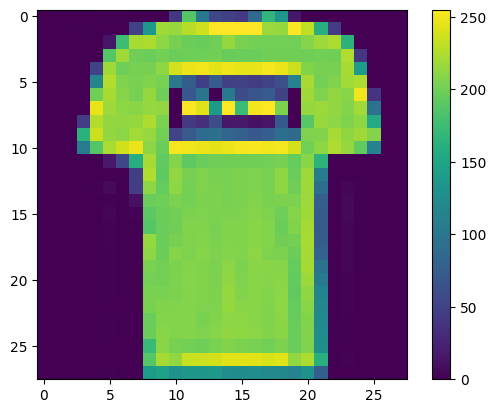

In [ ]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()
plt.show()

#y_train[1]=0 which is a top

In [ ]:
y_train[1]

np.uint8(0)

In [ ]:
class_names[y_train[0]]

# in y_train we have indexes from 0 to 9
# class names is a list of items

'ankle boot'

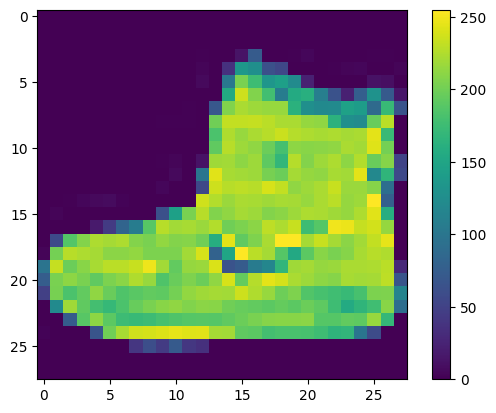

In [ ]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.show()

#y_train[1]=0 which is a top

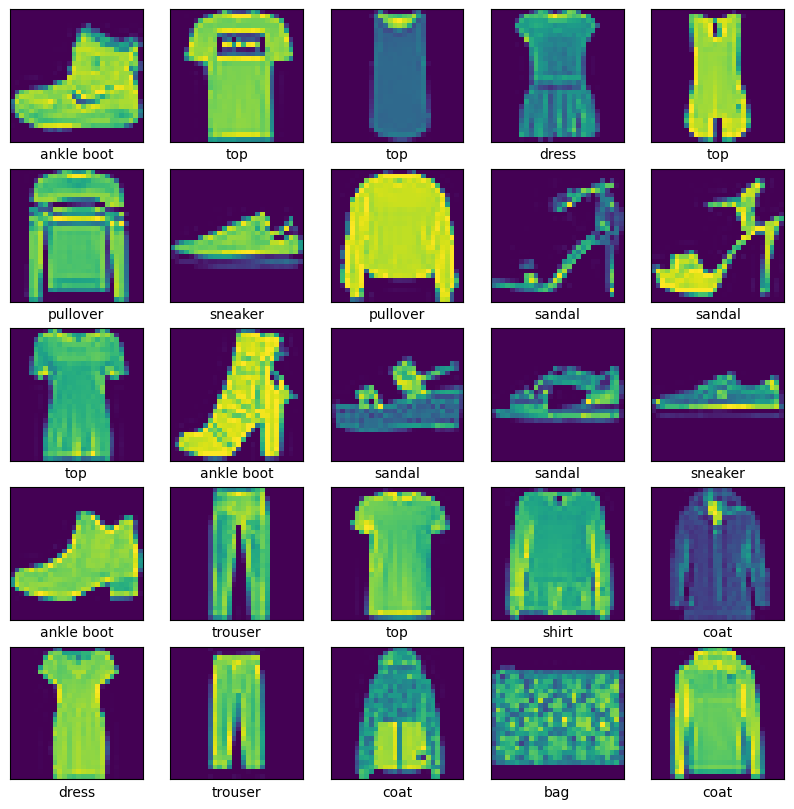

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  plt.xlabel(class_names[y_train[i]])

plt.show()

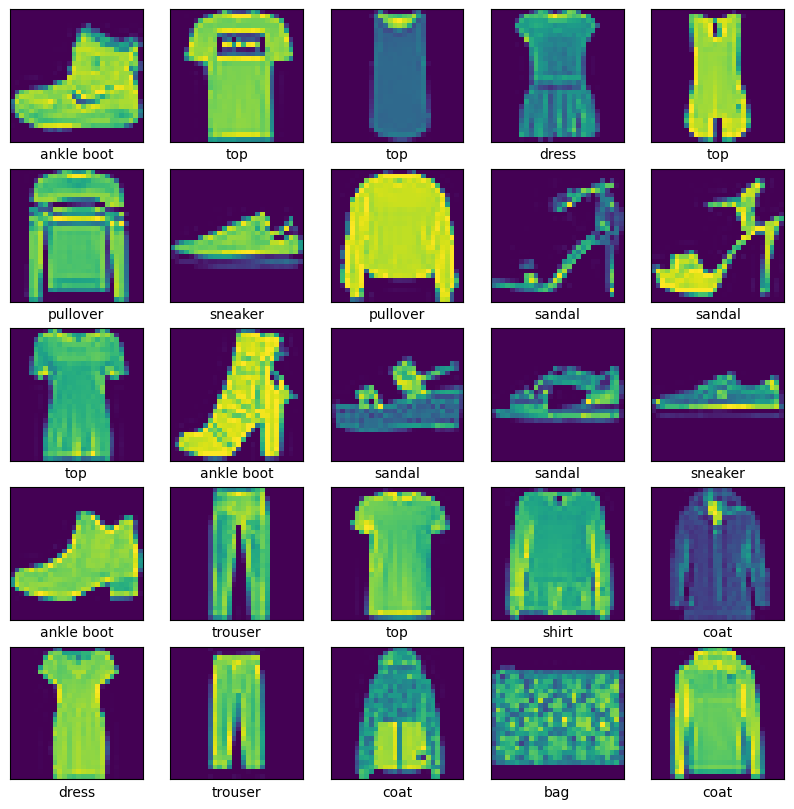

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[i])
  plt.xlabel(class_names[y_train[i]])

plt.show()

**Normalization**

 range between 0 to 1.

Neural Network model doesnot take value greater than 1
so we need to bring all the values between 0 to 1
To do this we will divide all the values in the traininh data set by 255 as the greatest value in our data set is 255

In [ ]:
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
# Now we can see that all values are between 0 to 1


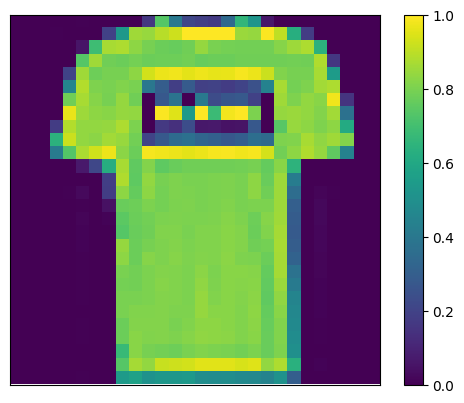

In [ ]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()

**Build the model with TF 2.0**

we will import the necessary layers to build the model. The Neural network is constructed from 3 types of layers:

**Input Layer** - initial data for the neural network.

**Hidden Layer** - intermediate layer between input and output layer and place where all the computation is done.

**output layer** - produce the result for given inputs.

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

**Flatten()** is used as the input layer to convert the data into a 1-d array for inputting it to the next layer. our image 2D image will converted to a single 1D column. input_shape=(28,28) because the size of our input image is 28x28.

**Dense()** layer is the regular deeply connected neural network layer. It is the most common and frequently used layer. we have a dense layer with 128 neurons with activation function reLU. The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive otherwise, it will output zero.

- The output layer is a dense layer with 10 neurons because we have 10 classses.
- The activation function used is softmax.
- Softmax converts a real vector to a vector of categorical probabilities.
- The elements of the output vector are in range (0,1) and sum to 1.
- Softmax is often used as activation function for the last layer of a
 classification network because the reult could be probability distribution

In [ ]:
model = Sequential()

# input layer starts flatten 28*28 ===== 1D

model.add(Flatten(input_shape = (28, 28)))   # 28*28=784



# one hidden layer
# how many neurons want to use: 128
# which activation function want to use: ReLU
# bcz it avoids vanish gradient problems

model.add(Dense(128, activation='relu' )) # 128:  784x784+128*(1 bias)



# output layer
# how many classes are there: 10
# how many neurons: 10
# activation : softmax

model.add(Dense(10, activation= 'softmax'))   # 128 is attached with 10 neurons = 128x10=1280+10*(1bias)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

# how many weights for input layer = 28*28 =====> 784 =====> weights
# hidden layer weights =128

# total weights till input layer + hidden layer = 128*784=100352 + 128 = 100480
# hidden layr + output layer = 128*10+10=1290

# Total weights = 100480+1290

# servers drinks so much water


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

**Model Compilation**

**Loss Function**: A loss function is used to optimize the parameter values in a neural network model. Loss functions map a set of parameters values from a network onto a scalar value that indicates how well those parameters accomplish the task the network is intended to.

**Optimizer**: Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses.

**Metrics**: A metric is a function that is used to judge the performance of your model . Metric functions are similar to loss functions, except that the results from evaluating a metric are not used while training the model.

Here we are compiling the model and fitting it to the training data. we will use 10 epochs to train the model . An epoch is the iteration over the entire data provided.

**Log loss (Binary cross-entropy loss)**: A loss function that represents how much the predicted probabilities deviates from the true ones. It is used in binary cases.


** Cross-Entropy Loss**: A generalized form of the log loss which is used for multi classification problems.


In [ ]:
# Now we know how many weights need to update
# to find the weights we have optimizer

In [ ]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,
          y_train,
          epochs=10,
          batch_size=64,
          verbose=False)

# By default verbose=True which display all the information
# verbose= False which doesnot display the information

# epochs = Forward pass + Backward pass
# Forward pass assigns weights randomly at initial weight
#  Bckward pass update the weights by adam
# Back propogation
# loss===0 ======> wnew=wold-lr*d(cost)


# loss is not reducing
# weights are same===== vanishing gradient problem


# loss is reduced
# weights are same we are good to go

# here we are passing batch size=64
# 60000/64=938 mini batches  will pass at a same time


#by default we have 32 batches
# it means 60k/32=1875  mini batches

# Here we havent give batches

**Model evaluation**

we will evaluate the accuracy using the test data.

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print(test_acc)
print(test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8842 - loss: 0.3249
0.8840000033378601
0.3250475227832794


Here , we have got an accuracy of 88.95% and loss of 38.59%

Now we are going to do predictions using sklearn and see the accuracy. For that we will import accuracy_score from sklearn

In [ ]:
from sklearn.metrics import accuracy_score

predict classes generates class predictions for the input samples.
here we are giving X_test containing 10000 images as the input
we are predicting the accuracy
in the multilabel classification accuracy_score computes subset accuracy
the set of labels predicted for sample must exactly match the corresponding set of labels in the y_test

In [ ]:
y_pred=model.predict(X_test)
y_pred

# accuracy_score(y_test,y_pred)


# how many probabilities will get for one image == 10q




# In Ml will get direct labels as prediction
# but always remeber before getting the classes, we actually get some probabilities values
# for one test sample will get probability values that is equal to no of classes.
# In this problem we have 10 classes
# one test sample will get 1o probabilities
# which is highest probablility that is answer

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.69256225e-07, 4.79466848e-08, 9.14745684e-08, ...,
        1.46632185e-02, 2.56867133e-06, 9.83809412e-01],
       [8.84502515e-06, 2.57902311e-11, 9.98442888e-01, ...,
        2.69256002e-14, 1.10783700e-11, 2.87721480e-13],
       [2.20998918e-05, 9.99976575e-01, 6.20927324e-07, ...,
        2.66338499e-16, 1.72355397e-09, 1.15885263e-14],
       ...,
       [4.88462334e-04, 7.35380112e-08, 3.70483067e-05, ...,
        1.33183875e-09, 9.99211848e-01, 4.85409846e-12],
       [7.25441510e-07, 9.99905288e-01, 8.98144137e-08, ...,
        8.21981094e-11, 7.60790719e-09, 3.55226945e-07],
       [2.28506324e-05, 1.37204381e-06, 2.38260218e-05, ...,
        1.43374065e-02, 3.31586081e-04, 9.80699551e-05]], dtype=float32)

In [ ]:
len(y_pred[0])

10

In [ ]:
np.sum(y_pred[0]) # index of maximum value is 9

np.float32(0.9999999)

In [ ]:
y_pred[0]

array([1.69256225e-07, 4.79466848e-08, 9.14745684e-08, 6.89970858e-10,
       3.74798276e-07, 1.52181135e-03, 2.18934110e-06, 1.46632185e-02,
       2.56867133e-06, 9.83809412e-01], dtype=float32)

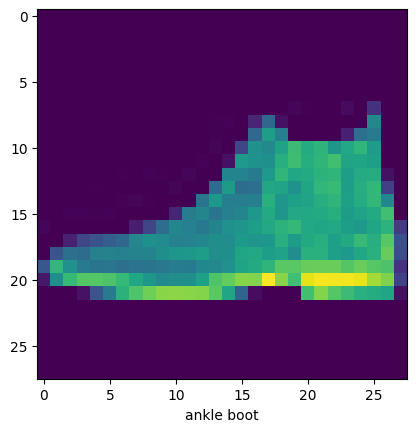

In [ ]:
plt.figure()
plt.imshow(X_test[0])
# X_test[0] == 1st image  y_pred=10 values out of which is maximum.
plt.xlabel(class_names[9])
plt.show()

In [ ]:
max=np.max(y_pred[0])
max

np.float32(0.9838094)

In [ ]:
index=list(y_pred[0]).index(max)
index

9

In [ ]:
y_pred[0]
max=np.max(y_pred[1])
index=list(y_pred[1]).index(max)
class_names[index]



'pullover'

In [ ]:
np.max(y_pred[0]),np.argmax(y_pred[0])

(np.float32(0.9838094), np.int64(9))

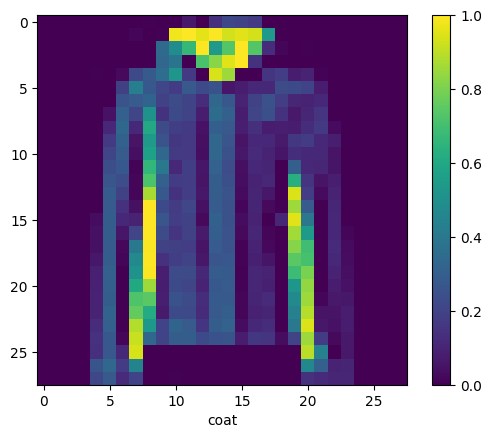

In [ ]:
plt.figure()
plt.imshow(X_test[6])
plt.xlabel(class_names[np.argmax(y_pred[6])])
plt.colorbar()
plt.show()

In [ ]:

max_values=[np.max(i) for i in y_pred]
index=[np.argmax(i) for i in y_pred]
prediction=[class_names[i] for i in index]
Ground_truth=[class_names[i] for i in y_test]
import pandas as pd
d1=pd.DataFrame(zip(max_values,index,prediction,Ground_truth),
             columns=['max_values','Index','Prediction','Ground_truth'])
d1['output']=np.where(d1['Prediction']==d1['Ground_truth'],1,0)
d1

,max_values,Index,Prediction,Ground_truth,output
0,0.983809,9,ankle boot,ankle boot,1
1,0.998443,2,pullover,pullover,1
2,0.999977,1,trouser,trouser,1
3,0.999973,1,trouser,trouser,1
4,0.745708,6,shirt,shirt,1
...,...,...,...,...,...
9995,0.999941,9,ankle boot,ankle boot,1
9996,0.999134,1,trouser,trouser,1
9997,0.999212,8,bag,bag,1
9998,0.999905,1,trouser,trouser,1
